In [1]:
##import all of the tools, rename them so its easier to call them
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from math import pi

In [2]:
# bayes weighted rating
def bayes_weighted_rating(data, this_col, m, C):
    v = data['counts']
    R = data[this_col]
    return ((v/(v+m)*R) + (m/(m+v)*C))

In [3]:
# new review overall
def new_review_overall(data, review_cols, corr):
    new_review = 0
    for col in review_cols:
        new_review = new_review + data[col]*corr[col]
    return new_review/sum(corr)

In [4]:
### visual settings
my_colors = plt.cm.get_cmap("Set2", 4)
div_cmap = sns.diverging_palette(144, 270, s=87, l=50, n=9, as_cmap = True)
plt.style.use('seaborn-darkgrid') # this makes the grid below have a gray background through matplotlib

In [5]:
# reading in data
file = '../data/beer_reviews.csv' #".." exits the data file we are in. After that, we open the other file
data = pd.read_csv(file) #this is listing all the data in the file as data, through pandas, so its easier to call

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


(array([7.00000e+00, 0.00000e+00, 1.09540e+04, 1.29750e+04, 3.82250e+04,
        5.85230e+04, 1.65644e+05, 3.01817e+05, 5.82764e+05, 4.15705e+05]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

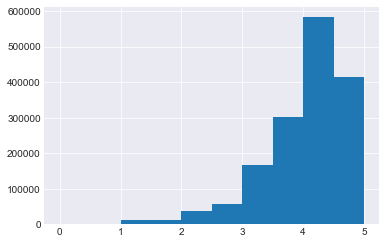

In [8]:
# data.beer_styles is equivalent to data['beer_styles']

my_bins = len(data.review_overall.unique()) # since we're binning abv in reviews

sub_data = data[['review_overall', 'beer_abv']]
plt.hist(data.review_overall, bins=my_bins)

In [9]:
print('number of unique beer styles: ', len(data.beer_style.unique()))
data.groupby('beer_style', as_index = True)[['beer_style','beer_abv']].head(10)

number of unique beer styles:  104


,beer_style,beer_abv
0,Hefeweizen,5.0
1,English Strong Ale,6.2
2,Foreign / Export Stout,6.5
3,German Pilsener,5.0
4,American Double / Imperial IPA,7.7
...,...,...
295478,Bière de Champagne / Bière Brut,10.3
295479,Bière de Champagne / Bière Brut,10.3
295480,Bière de Champagne / Bière Brut,10.3
295481,Bière de Champagne / Bière Brut,10.3


In [10]:
data.describe().transpose() #describes data and flips the axis

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [11]:
len(data.beer_beerid.unique()) # how many distinct beers there are


66055

In [12]:
len(data.brewery_id.unique()) # how many distinct brewery ids there are

5840

In [13]:
len(data.review_profilename.unique()) # how many distinct reviewers there are

33388

In [14]:
# median number of reviews a user gives
data.groupby('review_profilename', as_index = True)['beer_beerid']\
    .count()\
    .median() # first line finds all reviews given by each user, second line counts them, third line gives the median

3.0

In [15]:
# mean number of reviews a user gives
data.groupby('review_profilename', as_index = True)['beer_beerid']\
    .count()\
    .mean()

47.511486506724175

In [16]:
# median number of reviews a beer gets
data.groupby('beer_beerid', as_index = True)['review_overall']\
    .count()\
    .median()

2.0

In [17]:
#mean number of reviews a beer gets
data.groupby('beer_beerid', as_index = True)['review_overall']\
    .count()\
    .mean()

24.019589735826205

In [18]:
reviews = data[data['beer_beerid'].map(data['beer_beerid'].value_counts()) > 25]

In [19]:
reviews = reviews[reviews['review_profilename'].map(data['review_profilename'].value_counts()) > 48]

In [20]:
reviews['review_time'] = pd.to_datetime(reviews['review_time'], unit = 's')

Text(0.5, 1.0, "Numeric Feature's Correlation")

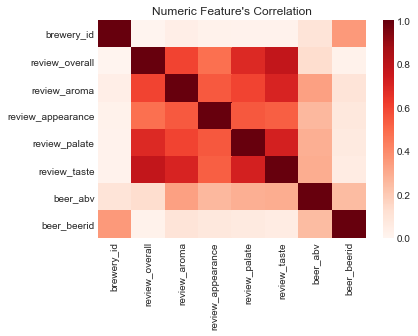

In [21]:
numeric_cols = reviews.select_dtypes(include=['int64', 'float64']).columns 

sns.heatmap(reviews[numeric_cols].corr(), vmin = 0, vmax = 1, center = 0.5, cmap = 'Reds')
plt.title('Numeric Feature\'s Correlation')
# this chart shows that the highest

In [22]:
reviews.isnull().sum()

brewery_id                0
brewery_name              0
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename        0
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              16827
beer_beerid               0
dtype: int64

In [23]:
reviews.beer_abv = reviews.groupby('beer_style')['beer_abv'].apply(lambda x: x.fillna(x.mean()))

In [24]:
# view the data as a time series
reviews = reviews.sort_values('review_time', ascending=False)

In [25]:
# drop the duplicates
reviews = reviews.drop_duplicates(subset= ['review_profilename', 'beer_name', 'brewery_name'], keep='first')

In [26]:
reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
brewery_id,1175246.0,2588.336452,5009.348450,1.0,140.0,363.0,1534.0,27681.0
review_overall,1175246.0,3.829630,0.694019,1.0,3.5,4.0,4.5,5.0
review_aroma,1175246.0,3.760654,0.672908,1.0,3.5,4.0,4.0,5.0
review_appearance,1175246.0,3.860878,0.598254,1.0,3.5,4.0,4.0,5.0
review_palate,1175246.0,3.766262,0.658550,1.0,3.5,4.0,4.0,5.0
review_taste,1175246.0,3.811445,0.701609,1.0,3.5,4.0,4.5,5.0
beer_abv,1175246.0,7.125685,2.316692,0.3,5.3,6.5,8.5,41.0
beer_beerid,1175246.0,19563.531162,20796.208240,5.0,1490.0,9086.0,36468.0,76816.0


In [27]:
### Finding beers with the highest ABV

beer_highest_abv = data[['beer_name', 'beer_abv']]\
                    .drop_duplicates('beer_name')\
                    .sort_values('beer_abv', ascending = False)
# the first line: this is creating a new data set of beers with their names and abv
# the second line: this gets rid of all the duplicate beers
# the third line: this is sorting the beers by abv, since ascending is the default, saying "ascending = False" makes it descending instead
print('Beer with highest ABV:')
print(beer_highest_abv.head(10))

Beer with highest ABV:
                             beer_name  beer_abv
12919    Schorschbräu Schorschbock 57%     57.70
12939    Schorschbräu Schorschbock 43%     43.00
746310              Sink The Bismarck!     41.00
12934    Schorschbräu Schorschbock 40%     39.44
996149      Black Damnation VI - Messy     39.00
748332        Tactical Nuclear Penguin     32.00
12918    Schorschbräu Schorschbock 31%     30.86
1042320                           Dave     29.00
746420                      Ghost Deer     28.00
293578            Samuel Adams Utopias     27.00


In [28]:
### Finding the highest ABV from each of the strongest breweries
brewery_highest_abv = data.sort_values('beer_abv', ascending = False)[['brewery_name', 'beer_abv']]\
        .drop_duplicates('brewery_name')
print('Highest ABV from each of the strongest breweries')
print(brewery_highest_abv.head(10))

Highest ABV from each of the strongest breweries
                                              brewery_name  beer_abv
12919                                         Schorschbräu     57.70
746385                                             BrewDog     41.00
996153                                 De Struise Brouwers     39.00
1042328  Hair of the Dog Brewing Company / Brewery and ...     29.00
293821                  Boston Beer Company (Samuel Adams)     27.00
569500                           LagerHaus Grill & Brewery     22.00
1386396                             DuClaw Brewing Company     21.92
1199891                            Short's Brewing Company     20.00
1375146                         Grand Lake Brewing Company     20.00
667534                             Sonoran Brewing Company     19.50


In [29]:
### Aggregate data with counts for unique beer/brewery entries, mean ABV, and median ABV
brewery_abv = data[data.beer_abv.notna()][['beer_name', 'brewery_name', 'beer_abv']]\
            .drop_duplicates(['beer_name', 'brewery_name'])\
            .groupby('brewery_name', as_index = False)[['beer_abv', 'beer_name']]\
            .agg({'beer_name': 'count', 'beer_abv': ['median', 'mean']})
brewery_abv.columns = brewery_abv.columns.to_series().str.join('_')
brewery_abv.rename(columns = {'brewery_name_' : 'brewery_name'}, inplace = True)

In [30]:
brewery_abv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beer_name_count,5155.0,9.467507,17.361097,1.0,2.000,4.000000,10.0,522.00
beer_abv_median,5155.0,5.651426,1.217984,0.5,4.900,5.350000,6.2,16.00
beer_abv_mean,5155.0,5.798452,1.253577,0.5,4.975,5.566667,6.5,24.69


In [31]:
### Brewery with the highest mean ABV
brewery_mean_abv = brewery_abv[brewery_abv['beer_name_count'] >= 4][['brewery_name', 'beer_abv_mean']]\
                .sort_values('beer_abv_mean', ascending = False)
print('Breweries with the highest average ABV:')
print(brewery_mean_abv.head(10))

Breweries with the highest average ABV:
                         brewery_name  beer_abv_mean
4207                     Schorschbräu      24.690000
755   Brasserie Dubuisson Frères sprl      10.607143
1158      Brouwerij De Dolle Brouwers      10.257143
89           AleSmith Brewing Company      10.165769
1731              De Struise Brouwers      10.130435
4249          Sherbrooke Liquor Store      10.000000
3655          Pacific Rim Brewing Co.       9.825000
1190        Brouwerij Het Alternatief       9.750000
1883          Element Brewing Company       9.675000
164              Arctic Craft Brewery       9.666667


In [32]:
### Brewery with the highest median ABV
brewery_median_abv = brewery_abv[brewery_abv['beer_name_count'] >= 4][['brewery_name', 'beer_abv_median']]\
                .sort_values('beer_abv_median', ascending = False)
print('Breweries with the highest median ABV:')
print(brewery_median_abv.head(10))

Breweries with the highest median ABV:
                                           brewery_name  beer_abv_median
4207                                       Schorschbräu            16.00
755                     Brasserie Dubuisson Frères sprl            11.25
89                             AleSmith Brewing Company            11.00
1158                        Brouwerij De Dolle Brouwers            10.50
1731                                De Struise Brouwers            10.00
2312  Hair of the Dog Brewing Company / Brewery and ...            10.00
4826                      Two Rows Restaurant & Brewery             9.80
1190                          Brouwerij Het Alternatief             9.50
1994                             FiftyFifty Brewing Co.             9.50
1170                                 Brouwerij De Molen             9.20


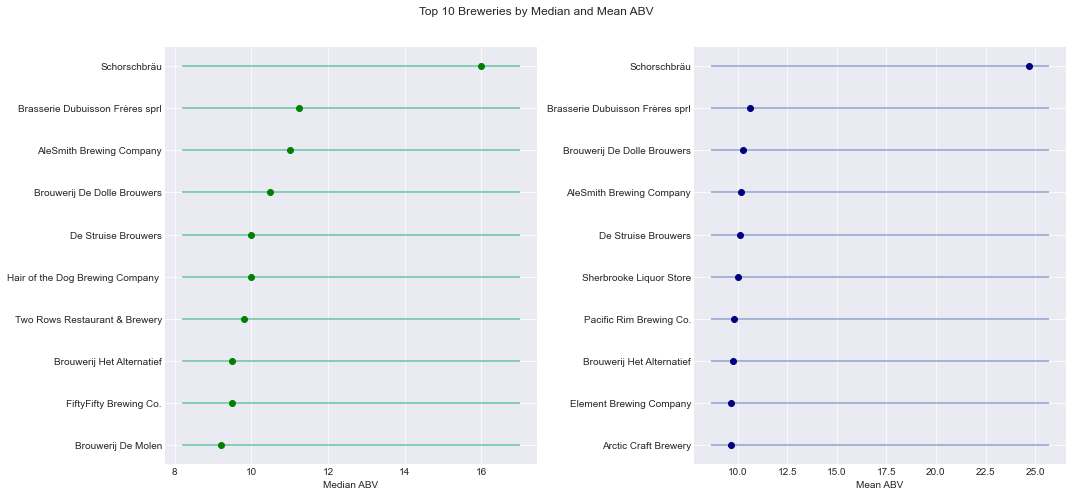

In [33]:
x0 = brewery_median_abv.beer_abv_median.head(10).iloc[::-1]
y0 = brewery_median_abv.brewery_name.head(10).iloc[::-1].tolist()
y0[4] = y0[4].split('/')[0] #long name fix

x1 = brewery_mean_abv.beer_abv_mean.head(10).iloc[::-1]
y1 = brewery_mean_abv.brewery_name.head(10).iloc[::-1].tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,7))

my_range = range(1,11)

## plot 1
axes[0].hlines(y=my_range, xmin=min(x0)-1, xmax=max(x0)+1, color=my_colors(0))
axes[0].plot(x0, my_range, 'o', color = 'g')

# Titles, axis names for plot 1
axes[0].set_yticks(my_range)
axes[0].set_yticklabels(y0)
axes[0].set_xlabel('Median ABV')

## plot 2
axes[1].hlines(y=my_range, xmin=min(x1)-1, xmax=max(x1)+1, color=my_colors(1))
axes[1].plot(x1, my_range, 'o', color = 'navy')

# Titles, axis names for plot 2
axes[1].set_yticks(my_range)
axes[1].set_yticklabels(y1)
axes[1].set_xlabel('Mean ABV')

# final plot
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Top 10 Breweries by Median and Mean ABV")

plt.show()

### Schorschbrau is shown below to be consistently the strongest brewer

In [34]:
reviews.groupby('beer_beerid', as_index = True)['review_overall']\
    .count().describe().transpose()

count    7848.000000
mean      149.751019
std       225.746173
min        14.000000
25%        37.000000
50%        66.000000
75%       157.000000
max      2319.000000
Name: review_overall, dtype: float64

In [35]:
m = 157

In [36]:
#pearson correlations
review_cols = [col for col in data.columns if 'review' in col]
review_cols = [col for col in review_cols if ('time' not in col and 'profilename' not in col)]

review_overall_corr = reviews[review_cols].corr()['review_overall']
review_overall_corr

review_overall       1.000000
review_aroma         0.602506
review_appearance    0.482996
review_palate        0.689357
review_taste         0.777794
Name: review_overall, dtype: float64

In [37]:
# number of reviews for a beer and the mean rating
grp = reviews.groupby(['beer_beerid', 'beer_name', 'brewery_name'])
agg_reviews = grp.size().to_frame(name = 'counts')
agg_reviews = (agg_reviews
              .join(grp.agg({'review_overall': 'mean'}))
              .join(grp.agg({'review_aroma': 'mean'}))
              .join(grp.agg({'review_appearance': 'mean'}))
              .join(grp.agg({'review_palate': 'mean'}))
              .join(grp.agg({'review_taste': 'mean'}))              
              .reset_index()
              )

# get the average for each beer
agg_reviews['new_review_overall'] = agg_reviews\
              .apply(new_review_overall, args = (review_cols, review_overall_corr), axis = 1)

# For analysis later
review_cols.append('new_review_overall')
# top beers so far
agg_reviews.sort_values('new_review_overall', ascending = False).head(5)

,beer_beerid,beer_name,brewery_name,counts,review_overall,review_aroma,review_appearance,review_palate,review_taste,new_review_overall
3819,24273,M Belgian-Style Barleywine,Midnight Sun Brewing Co.,24,4.833333,4.812500,4.479167,4.854167,4.916667,4.803937
7384,63649,Rare D.O.S.,Peg's Cantina & Brewpub / Cycle Brewing,24,4.854167,4.770833,4.458333,4.812500,4.875000,4.782695
7648,68548,Armand'4 Oude Geuze Lente (Spring),Brouwerij Drie Fonteinen,57,4.719298,4.710526,4.500000,4.657895,4.710526,4.674161
5715,44910,Dirty Horse,De Struise Brouwers,32,4.812500,4.609375,4.406250,4.593750,4.750000,4.666691
3646,21690,Pliny The Younger,Russian River Brewing Company,454,4.574890,4.707048,4.443833,4.585903,4.698238,4.608627


In [38]:
# Let C be the average rating of all beers
C = agg_reviews['new_review_overall'].mean()
mean_review = agg_reviews.mean()
print('The average rating of all beers is: ', np.round(C, 2))

# top 75%
agg_reviews = agg_reviews[agg_reviews['counts'] > m]
this_col = 'new_review_overall'
agg_reviews['review_weighted'] = agg_reviews.apply(bayes_weighted_rating, args = (this_col, m, C), axis = 1)
agg_reviews = agg_reviews.sort_values('review_weighted', ascending = False)

The average rating of all beers is:  3.7


In [43]:
agg_reviews.head(3)

,beer_beerid,beer_name,brewery_name,counts,review_overall,review_aroma,review_appearance,review_palate,review_taste,new_review_overall,review_weighted
835,1545,Trappist Westvleteren 12,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,1026,4.593080,4.567251,4.420565,4.613548,4.700292,4.592690,4.474132
2519,7971,Pliny The Elder,Russian River Brewing Company,1669,4.573996,4.596465,4.366687,4.427801,4.608149,4.528732,4.457421
3469,19960,Founders KBS (Kentucky Breakfast Stout),Founders Brewing Company,1419,4.384778,4.559901,4.341790,4.480268,4.619098,4.478463,4.400848


In [44]:
# Plot how these beers compare to the average
mean_review['review_weighted'] = mean_review['new_review_overall']

top_beers = agg_reviews.head(3)
top_beers = top_beers.append(mean_review, ignore_index = True)

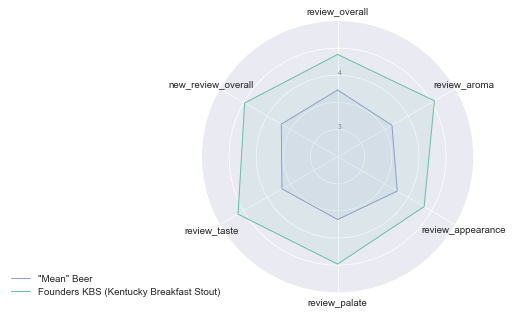

In [45]:
### Create the background

# number of variables
N = len(review_cols)

# angle of each axis
angles = [n/float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# initialise the radar graph
plt.figure(figsize=(5,7), dpi= 70, facecolor='w', edgecolor='k')
ax = plt.subplot(111, polar=True)

# set the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], review_cols)

# draw ylabels
ax.set_rlabel_position(0)
plt.yticks([3, 3.5,4, 4.5], ["3", "", "4", ""], color="grey", size=7)
plt.ylim(2.5,5)

## --- add plots

## Mean Beer

values=top_beers.loc[3][review_cols].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color = my_colors(1), linewidth=1, linestyle='solid', label="\"Mean\" Beer")
ax.fill(angles, values, color = my_colors(1), alpha=0.1)

## Top Beer

# change this number to whichever top beer (1:3) you want to graph 
rank = 3

rank -= 1
values=top_beers.loc[rank][review_cols].values.flatten().tolist()
values += values[:1]
title = top_beers.loc[rank]['beer_name']
ax.plot(angles, values, color = my_colors(0), linewidth=1, linestyle='solid', label=title)
ax.fill(angles, values, color = my_colors(0), alpha=0.1)

## Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [46]:
review_cols = review_cols[:-1]
#remove the "new_review_overall", cleanup for next section

In [47]:
review_cats = reviews[review_cols]
review_cats.columns = review_cats.columns.to_series().str.lstrip('review_').apply(lambda x: x.capitalize())

Text(0.5, 1.0, 'Pearson Correlation of Beer Review Categories')

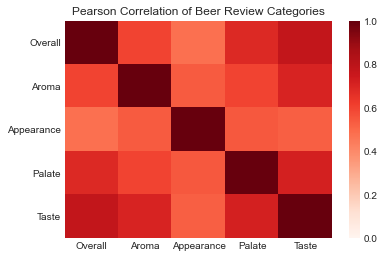

In [50]:
pearson_corr = review_cats.corr() # pearson is the default
sns.heatmap(pearson_corr, vmin = 0, vmax = 1, center = 0.5, cmap='Reds')
plt.title('Pearson Correlation of Beer Review Categories')

Text(0.5, 1.0, 'Pearson Correlation of Beer Review Categories')

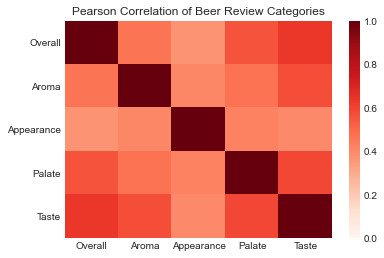

In [51]:
kendall_corr = review_cats.corr(method = 'kendall')
sns.heatmap(kendall_corr, vmin = 0, vmax = 1, center = 0.5, cmap='Reds')
plt.title('Pearson Correlation of Beer Review Categories')

Text(0.5, 1.0, 'Pearson Correlation of Beer Review Categories')

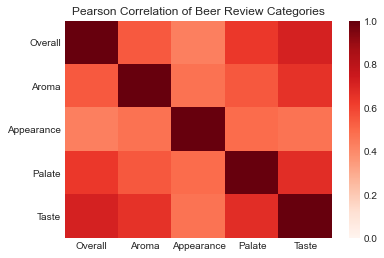

In [52]:
spearman_corr = review_cats.corr(method = 'spearman')
sns.heatmap(spearman_corr, vmin = 0, vmax = 1, center = 0.5, cmap='Reds')
plt.title('Pearson Correlation of Beer Review Categories')

In [53]:
pd.concat([spearman_corr['Overall'].rename('Spearman'), 
           kendall_corr['Overall'].rename('Kendall'), 
           pearson_corr['Overall'].rename('Pearson')], axis = 1)

,Spearman,Kendall,Pearson
Overall,1.000000,1.000000,1.000000
Aroma,0.543660,0.466756,0.602506
Appearance,0.433946,0.370062,0.482996
Palate,0.640561,0.560050,0.689357
Taste,0.717016,0.637798,0.777794


In [55]:
agg_style = grp.size().to_frame(name='counts')

In [56]:
reviews.groupby('beer_style', as_index = True)['review_overall']\
  .count().describe().transpose()

count      104.000000
mean     11300.442308
std      13528.561917
min         63.000000
25%       2925.250000
50%       7344.500000
75%      14982.500000
max      87940.000000
Name: review_overall, dtype: float64

In [57]:
m = 7344

In [58]:
### Aggregate the data with counts and mean aroma/appearance for popular beer styles
grp = reviews.groupby('beer_style') 
agg_style = grp.size().to_frame(name='counts')
agg_style = (agg_style
                .join(grp.agg({'review_overall': 'mean'}))
                .join(grp.agg({'review_aroma': 'mean'}))
                .join(grp.agg({'review_appearance': 'mean'}))
                .join(grp.agg({'review_palate': 'mean'}))
                .join(grp.agg({'review_taste': 'mean'}))
                .reset_index()
              )

agg_style['aroma_appearance_mean'] = (agg_style.review_aroma + agg_style.review_appearance)/2

In [59]:
# C should be the average rating of ALL beers, not only the top 50%
C = agg_style['aroma_appearance_mean'].mean()
mean_review = agg_style.mean()
print('The average combined aroma/appearance rating of all beer styles is: ', np.round(C, 2))

# now we want only the top 50% by number of ratings
agg_style = agg_style[agg_style['counts'] > m]
this_col = 'aroma_appearance_mean'
agg_style['aro_app_weighted'] = agg_style.apply(bayes_weighted_rating, args = (this_col, m, C), axis=1)
agg_style = agg_style.sort_values('aro_app_weighted', ascending = False)

The average combined aroma/appearance rating of all beer styles is:  3.7


In [60]:
agg_style_sorted = agg_style.sort_values('aroma_appearance_mean', ascending = False)
agg_style_sorted.head(10)

,beer_style,counts,review_overall,review_aroma,review_appearance,review_palate,review_taste,aroma_appearance_mean,aro_app_weighted
11,American Double / Imperial Stout,40456,4.019070,4.152029,4.150040,4.093546,4.178577,4.151034,4.081411
89,Russian Imperial Stout,43173,4.014975,4.072059,4.199465,4.082030,4.138941,4.135762,4.072104
86,Quadrupel (Quad),14865,4.057888,4.122032,4.106559,4.114497,4.196939,4.114295,3.976596
9,American Double / Imperial IPA,66973,3.986300,4.089700,4.075448,4.018336,4.077554,4.082574,4.044559
20,American Wild Ale,13626,4.105423,4.142889,4.015375,4.056950,4.160906,4.079132,3.945611
100,Weizenbock,7509,4.014982,4.060594,4.020842,3.997403,4.083833,4.040718,3.871202
4,American Barleywine,21332,3.896540,4.023673,4.044604,4.004242,4.045729,4.034139,3.948022
23,Belgian IPA,10036,3.955012,3.979574,4.086489,3.947539,4.000648,4.033031,3.891411
5,American Black Ale,8286,3.918537,3.923787,4.121711,3.903512,3.958364,4.022749,3.870104
19,American Strong Ale,25254,3.875980,3.987467,4.033005,3.964362,4.036212,4.010236,3.939865


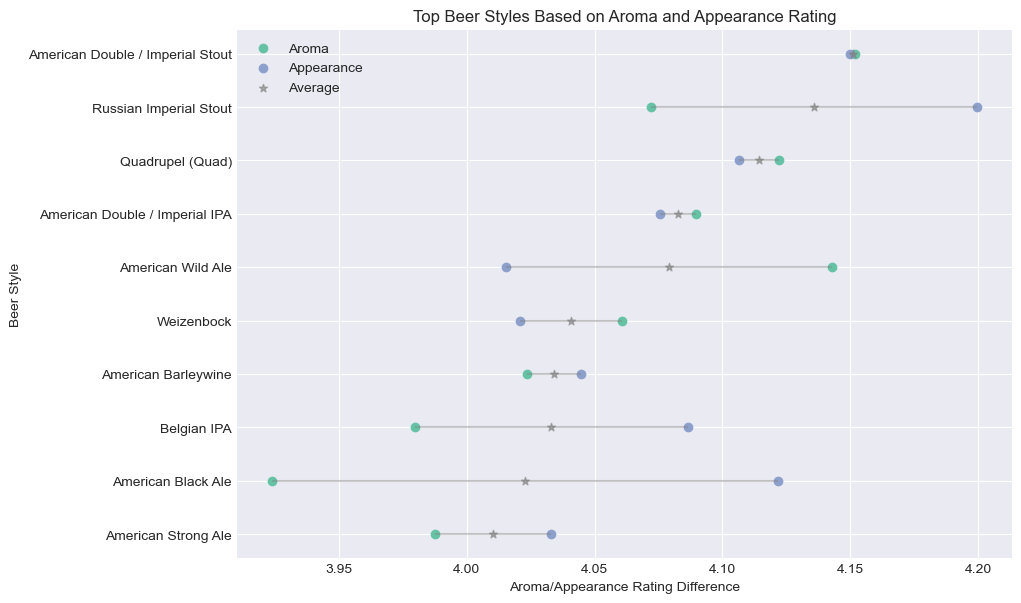

In [61]:
### lolipop plot

# our data to plot
x0 = np.array(agg_style_sorted.review_aroma.head(10).iloc[::-1])
x1 = np.array(agg_style_sorted.review_appearance.head(10).iloc[::-1])
x2 = np.array(agg_style_sorted.aroma_appearance_mean.head(10).iloc[::-1])
y = agg_style_sorted.beer_style.head(10).iloc[::-1]

# since top 10
my_range = range(1,11)

# --- plot
x_min = np.minimum(x0, x1)
x_max = np.maximum(x0, x1)

plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')

plt.hlines(y=my_range, xmin=x_min, xmax=x_max, color='grey', alpha=0.4)
plt.scatter(x0, my_range, color= my_colors(0), label='Aroma')
plt.scatter(x1, my_range, color= my_colors(1), label='Appearance')
plt.scatter(x2, my_range, color= 'grey', alpha=0.6, marker='*', label='Average')
plt.legend(loc=2)

# --- title/axis
plt.yticks(my_range, y)
plt.title("Top Beer Styles Based on Aroma and Appearance Rating")
plt.xlabel('Aroma/Appearance Rating Difference')
plt.ylabel('Beer Style')


plt.show()

In [62]:
agg_style_sorted = agg_style.sort_values('aro_app_weighted', ascending = False)
agg_style_sorted.head(10)

,beer_style,counts,review_overall,review_aroma,review_appearance,review_palate,review_taste,aroma_appearance_mean,aro_app_weighted
11,American Double / Imperial Stout,40456,4.019070,4.152029,4.150040,4.093546,4.178577,4.151034,4.081411
89,Russian Imperial Stout,43173,4.014975,4.072059,4.199465,4.082030,4.138941,4.135762,4.072104
9,American Double / Imperial IPA,66973,3.986300,4.089700,4.075448,4.018336,4.077554,4.082574,4.044559
86,Quadrupel (Quad),14865,4.057888,4.122032,4.106559,4.114497,4.196939,4.114295,3.976596
4,American Barleywine,21332,3.896540,4.023673,4.044604,4.004242,4.045729,4.034139,3.948022
20,American Wild Ale,13626,4.105423,4.142889,4.015375,4.056950,4.160906,4.079132,3.945611
19,American Strong Ale,25254,3.875980,3.987467,4.033005,3.964362,4.036212,4.010236,3.939865
25,Belgian Strong Dark Ale,30628,3.917837,3.981145,4.009387,3.946062,4.033940,3.995266,3.937749
12,American IPA,87940,3.967586,3.896452,3.978576,3.870571,3.918314,3.937514,3.919044
92,Saison / Farmhouse Ale,24247,3.967047,3.943807,4.018250,3.903844,3.938405,3.981029,3.915204


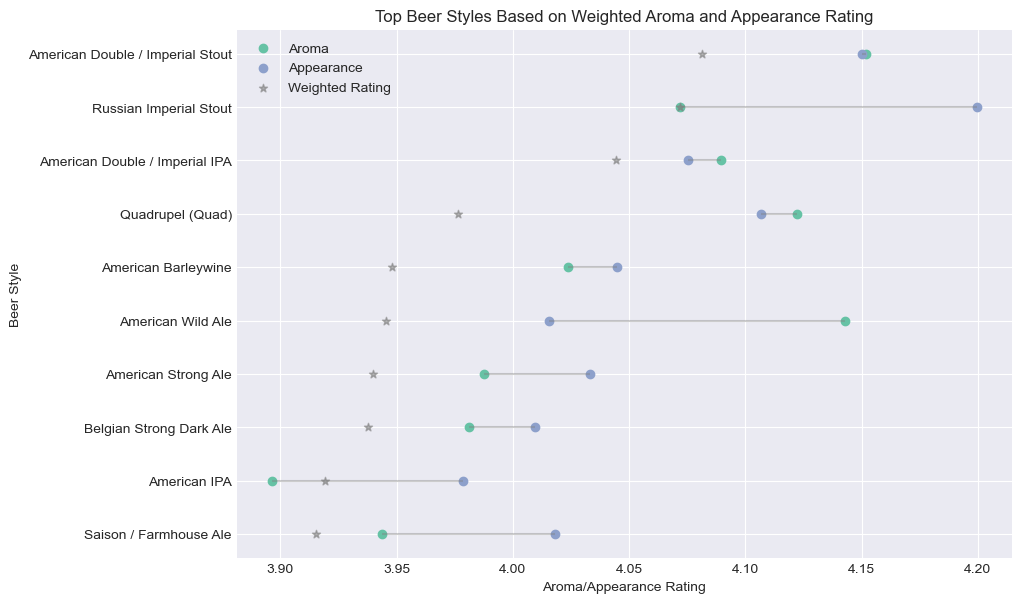

In [63]:
### lolipop plot

# our data to plot
x0 = np.array(agg_style_sorted.review_aroma.head(10).iloc[::-1])
x1 = np.array(agg_style_sorted.review_appearance.head(10).iloc[::-1])
x2 = np.array(agg_style_sorted.aro_app_weighted.head(10).iloc[::-1])
y = agg_style_sorted.beer_style.head(10).iloc[::-1]

# since top 10
my_range = range(1,11)

# --- plot
x_min = np.minimum(x0, x1)
x_max = np.maximum(x0, x1)

plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')

plt.hlines(y=my_range, xmin=x_min, xmax=x_max, color='grey', alpha=0.4)
plt.scatter(x0, my_range, color= my_colors(0), label='Aroma')
plt.scatter(x1, my_range, color= my_colors(1), label='Appearance')
plt.scatter(x2, my_range, color= 'grey', alpha=0.6, marker='*', label='Weighted Rating')
plt.legend(loc=2)

# --- title/axis
plt.yticks(my_range, y)
plt.title("Top Beer Styles Based on Weighted Aroma and Appearance Rating")
plt.xlabel('Aroma/Appearance Rating')
plt.ylabel('Beer Style')


plt.show()